In [ ]:
import os
import mne
import PyQt6
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import StratifiedKFold

%matplotlib qt


### Some data exploration

In [59]:
ctrl_files = os.listdir('bipolar/control (160)/')
channel_names  = []
channel_nums = []
lens = []
sampling_freqs = []
for f in ctrl_files:
    try:
        path = 'bipolar/control (160)/' + f
        sample = mne.io.read_raw_edf(path, verbose=False, preload=True)
        channels = [x for x in sample.ch_names if x.lower() not in ['status', 'events', 'event', 'status-0', 'status-1', 'ma dva(vstr)', 'markers']]
        channel_nums.append(len(channels))
        lens.append(len(sample) / sample.info['sfreq'])
        sampling_freqs.append(sample.info['sfreq'])
        found = False
        for ch in channel_names:
            if set(ch) == set(channels):
                found = True
                break
        if not found:
            channel_names.append(channels)
    except Exception as e:
        print(f'failed for {f} with {e}')

failed for Skopincev_20_EO_free.edf with could not convert string to float: '        '


In [60]:
for ch in channel_names:
    print(ch)

['EEG Fp1-A1', 'EEG Fp2-A2', 'EEG F7-A1', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A2', 'EEG F8-A2', 'EEG T3-A1', 'EEG C3-A1', 'EEG Cz-A2', 'EEG C4-A2', 'EEG T4-A2', 'EEG T5-A1', 'EEG P3-A1', 'EEG Pz-A1', 'EEG P4-A2', 'EEG T6-A2', 'EEG O1-A1', 'EEG O2-A2', 'EEG A1-A2', 'EEG A1-N']
['EEG Fp1-A1', 'EEG Fp2-A2', 'EEG F7-A1', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A2', 'EEG F8-A2', 'EEG T3-A1', 'EEG C3-A1', 'EEG Cz-A2', 'EEG C4-A2', 'EEG T4-A2', 'EEG T5-A1', 'EEG P3-A1', 'EEG Pz-A1', 'EEG P4-A2', 'EEG T6-A2', 'EEG O1-A1', 'EEG O2-A2']
['EEG Fp1-A1', 'EEG Fp2-A1', 'EEG F7-A1', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A1', 'EEG F8-A1', 'EEG T3-A1', 'EEG C3-A1', 'EEG Cz-A1', 'EEG C4-A1', 'EEG T4-A1', 'EEG T5-A1', 'EEG P3-A1', 'EEG Pz-A1', 'EEG P4-A1', 'EEG T6-A1', 'EEG O1-A1', 'EEG O2-A1', 'EEG A2-A1']
['EEG Fp1-A1', 'EEG Fp2-A2', 'EEG F7-A1', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A2', 'EEG F8-A2', 'EEG T3-A1', 'EEG C3-A1', 'EEG Cz-A2', 'EEG C4-A2', 'EEG T4-A2', 'EEG T5-A1', 'EEG P3-A1', 'EEG Pz-A1', 'EEG P4-A2', '

In [61]:
print(list(set(sampling_freqs)))

[250.0, 500.0]


In [62]:
print(np.max(channel_nums))
print(np.min(channel_nums))

21
19


In [63]:
print(np.mean(lens))
print(np.max(lens))
print(np.min(lens))

83.0909090909091
285.0
17.0


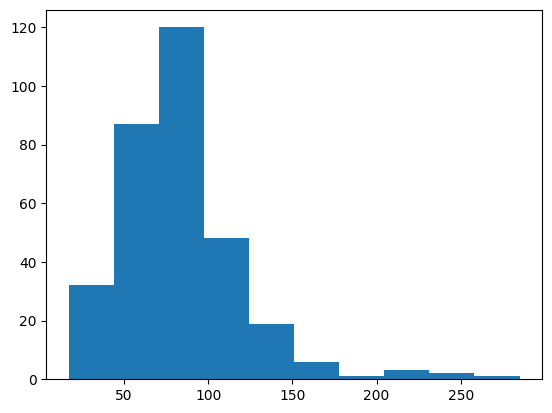

In [65]:
%matplotlib inline
plt.hist(lens)
plt.show()

In [28]:
ctrl_files = os.listdir('bipolar/Биполярка депресс тип (35)')
channel_names  = []
channel_nums = []
lens = []
sampling_freqs = []
for f in ctrl_files:
    try:
        path = 'bipolar/Биполярка депресс тип (35)/' + f
        sample = mne.io.read_raw_edf(path, verbose=False, preload=True)
        channels = [x for x in sample.ch_names if x.lower() not in ['status', 'events', 'event', 'status-0', 'status-1', 'ma dva(vstr)', 'markers']]
        channel_nums.append(len(channels))
        lens.append(len(sample) / sample.info['sfreq'])
        sampling_freqs.append(sample.info['sfreq'])
        found = False
        for ch in channel_names:
            if set(ch) == set(channels):
                found = True
                break
        if not found:
            channel_names.append(channels)
    except Exception as e:
        print(f'failed for {f} with {e}')

In [29]:
for ch in channel_names:
    print(ch)

['EEG Fp1-A1', 'EEG Fp2-A2', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A2', 'EEG F7-A1', 'EEG F8-A2', 'EEG T3-A1', 'EEG T4-A2', 'EEG C3-A1', 'EEG Cz-A2', 'EEG C4-A2', 'EEG T5-A1', 'EEG T6-A2', 'EEG P3-A1', 'EEG Pz-A1', 'EEG P4-A2', 'EEG O1-A1', 'EEG O2-A2']
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
['Fp1-A1', 'Fp2-A1', 'F7-A1', 'F3-A1', 'Fz-A1', 'F4-A1', 'F8-A1', 'T3-A1', 'C3-A1', 'Cz-A1', 'C4-A1', 'T4-A1', 'T5-A1', 'P3-A1', 'Pz-A1', 'P4-A1', 'T6-A1', 'O1-A1', 'O2-A1', 'A2-A1', 'A1-N']
['EEG Fp1-A1', 'EEG Fp2-A1', 'EEG F7-A1', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A1', 'EEG F8-A1', 'EEG T3-A1', 'EEG C3-A1', 'EEG Cz-A1', 'EEG C4-A1', 'EEG T4-A1', 'EEG T5-A1', 'EEG P3-A1', 'EEG Pz-A1', 'EEG P4-A1', 'EEG T6-A1', 'EEG O1-A1', 'EEG O2-A1']


In [30]:
print(list(set(sampling_freqs)))

[250.0]


In [31]:
print(np.max(channel_nums))
print(np.min(channel_nums))

21
19


In [32]:
print(np.mean(lens))
print(np.max(lens))
print(np.min(lens))

46.27142857142857
100.0
21.0


In [33]:
for f in ctrl_files:
    try:
        path = 'bipolar/control (160)/' + f
        sample = mne.io.read_raw_edf(path, verbose=False, preload=True)
        if 'MA DvA(vstr)' in sample.ch_names:
            print(path)
    except Exception as e:
        print(f'failed for {f} with {e}')

failed for BaV_m24_f31-3_f31-4_f31-6_og.edf with [Errno 2] No such file or directory: 'c:\\Users\\amina\\thesis\\bipolar\\control (160)\\BaV_m24_f31-3_f31-4_f31-6_og.edf'
failed for BaV_m24_f31-3_f31-4_f31-6_zg.edf with [Errno 2] No such file or directory: 'c:\\Users\\amina\\thesis\\bipolar\\control (160)\\BaV_m24_f31-3_f31-4_f31-6_zg.edf'
failed for BaV_m25_f31-3_f31-4_f31-6_og.edf with [Errno 2] No such file or directory: 'c:\\Users\\amina\\thesis\\bipolar\\control (160)\\BaV_m25_f31-3_f31-4_f31-6_og.edf'
failed for BaV_m25_f31-3_f31-4_f31-6_zg.edf with [Errno 2] No such file or directory: 'c:\\Users\\amina\\thesis\\bipolar\\control (160)\\BaV_m25_f31-3_f31-4_f31-6_zg.edf'
failed for DeYa_f17_f31-9_Nr_As_Nt_At_og.edf with [Errno 2] No such file or directory: 'c:\\Users\\amina\\thesis\\bipolar\\control (160)\\DeYa_f17_f31-9_Nr_As_Nt_At_og.edf'
failed for DeYa_f17_f31-9_Nr_As_Nt_At_zg.edf with [Errno 2] No such file or directory: 'c:\\Users\\amina\\thesis\\bipolar\\control (160)\\DeYa_

In [34]:
path = 'bipolar/циклотимия (13)/KaSV_m27_f34-0_f19-2_As_Ep_og.EDF'
sample = mne.io.read_raw_edf(path, verbose=False, preload=True)
print(sample.annotations)
print(sample.ch_names)
print(len(sample) / sample.info['sfreq'])
sample.info

<Annotations | 0 segments>
['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
46.0


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, T3, C3, Cz, C4, T4, T5, P3, Pz, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2024-10-11 15:18:48 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: Anonymous, birthday: 1951-05-13>
>

In [35]:
path = 'bipolar/циклотимия (13)/KaSV_m27_f34-0_f19-2_As_Ep_zg.EDF'
sample = mne.io.read_raw_edf(path, verbose=False, preload=True)
print(sample.ch_names)
print(len(sample) / sample.info['sfreq'])
print(sample.annotations)
sample.info

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'Status']
73.0
<Annotations | 0 segments>


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, T3, C3, Cz, C4, T4, T5, P3, Pz, ...
 chs: 19 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2024-10-11 15:16:23 UTC
 nchan: 20
 projs: []
 sfreq: 250.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: Anonymous, birthday: 1951-05-13>
>

### Process a single EEG file

In [36]:
path = 'bipolar/control (160)/МУЖ18__Т956_ОГ.EDF'
sample_og = mne.io.read_raw_edf(path, verbose=False, preload=True)
print(f'length: {len(sample_og) / sample_og.info["sfreq"]} seconds')
print(sample_og.ch_names)
sample_og.info

length: 78.0 seconds
['EEG Fp1-A1', 'EEG Fp2-A2', 'EEG F7-A1', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A2', 'EEG F8-A2', 'EEG T3-A1', 'EEG C3-A1', 'EEG Cz-A2', 'EEG C4-A2', 'EEG T4-A2', 'EEG T5-A1', 'EEG P3-A1', 'EEG Pz-A1', 'EEG P4-A2', 'EEG T6-A2', 'EEG O1-A1', 'EEG O2-A2', 'EEG A1-A2', 'EEG A1-N', 'Status']


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-A1, EEG Fp2-A2, EEG F7-A1, EEG F3-A1, EEG Fz-A1, EEG ...
 chs: 21 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2024-11-01 17:13:14 UTC
 nchan: 22
 projs: []
 sfreq: 250.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: Anonymous, birthday: 1951-05-13>
>

In [37]:
path = 'bipolar/control (160)/МУЖ18__Т956_ЗГ.EDF'
sample_zg = mne.io.read_raw_edf(path, verbose=False, preload=True)
print(f'length: {len(sample_zg) / sample_zg.info["sfreq"]} seconds')
print(sample_zg.ch_names)
sample_zg.info

length: 83.0 seconds
['EEG Fp1-A1', 'EEG Fp2-A2', 'EEG F7-A1', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A2', 'EEG F8-A2', 'EEG T3-A1', 'EEG C3-A1', 'EEG Cz-A2', 'EEG C4-A2', 'EEG T4-A2', 'EEG T5-A1', 'EEG P3-A1', 'EEG Pz-A1', 'EEG P4-A2', 'EEG T6-A2', 'EEG O1-A1', 'EEG O2-A2', 'EEG A1-A2', 'EEG A1-N']


<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-A1, EEG Fp2-A2, EEG F7-A1, EEG F3-A1, EEG Fz-A1, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2024-11-01 17:06:05 UTC
 nchan: 21
 projs: []
 sfreq: 250.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: Anonymous, birthday: 1951-05-13>
>

In [38]:
print(sample_og.ch_names)
print(sample_zg.ch_names)

['EEG Fp1-A1', 'EEG Fp2-A2', 'EEG F7-A1', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A2', 'EEG F8-A2', 'EEG T3-A1', 'EEG C3-A1', 'EEG Cz-A2', 'EEG C4-A2', 'EEG T4-A2', 'EEG T5-A1', 'EEG P3-A1', 'EEG Pz-A1', 'EEG P4-A2', 'EEG T6-A2', 'EEG O1-A1', 'EEG O2-A2', 'EEG A1-A2', 'EEG A1-N', 'Status']
['EEG Fp1-A1', 'EEG Fp2-A2', 'EEG F7-A1', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A2', 'EEG F8-A2', 'EEG T3-A1', 'EEG C3-A1', 'EEG Cz-A2', 'EEG C4-A2', 'EEG T4-A2', 'EEG T5-A1', 'EEG P3-A1', 'EEG Pz-A1', 'EEG P4-A2', 'EEG T6-A2', 'EEG O1-A1', 'EEG O2-A2', 'EEG A1-A2', 'EEG A1-N']


In [39]:
channel_names = {x: x[4:7].replace('-', '') for x in sample_og.ch_names if x.lower() not in ['status', 'events', 'event', 'status-0', 'status-1', 'ma dva(vstr)', 'markers', 'eeg a1-a2', 'eeg a1-n']}
# channel_names = {x: x[4:] for x in sample.ch_names if x != 'Status'}
# print(channel_names)

sample_1020_og = sample_og.copy()
sample_1020_og.drop_channels(['Status', 'EEG A1-A2', 'EEG A1-N'])
sample_1020_og.rename_channels(channel_names)
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
sample_1020_og = sample_1020_og.set_montage(ten_twenty_montage)

sample_1020_zg = sample_zg.copy()
sample_1020_zg.drop_channels(['EEG A1-A2', 'EEG A1-N'])
sample_1020_zg.rename_channels(channel_names)
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
sample_1020_zg = sample_1020_zg.set_montage(ten_twenty_montage)

In [40]:
# plt.figure(figsize=(10, 30))
plt.ion()
sample_1020_og.plot(start=20, duration=20)
plt.show()

Channels marked as bad:
none


Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


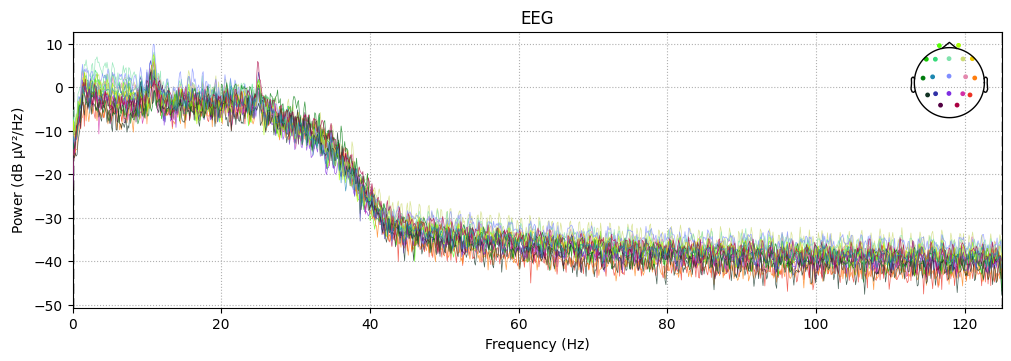

In [42]:
%matplotlib inline
sample_1020_og.compute_psd().plot()
plt.show()

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


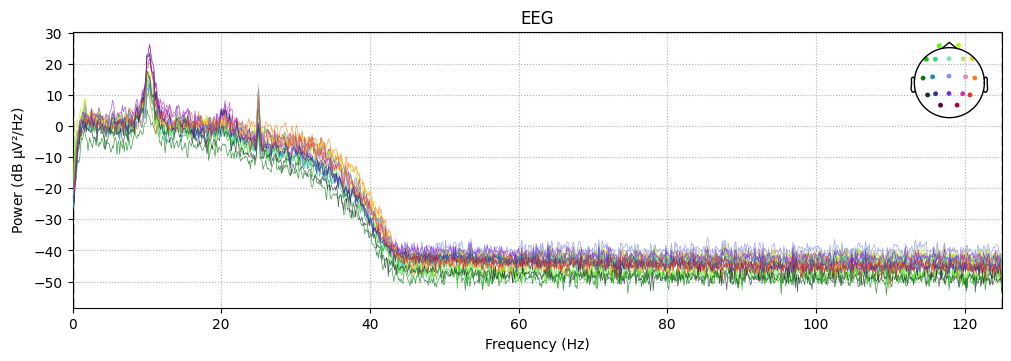

In [43]:
%matplotlib inline
sample_1020_zg.compute_psd().plot()
plt.show()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 50.00 Hz: -6.02, -6.02 dB

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


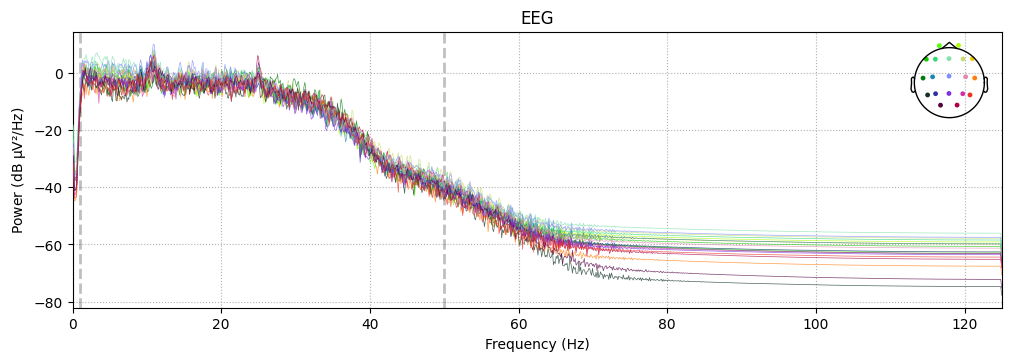

In [44]:
%matplotlib inline
sample_1020_og = sample_1020_og.filter(l_freq=1, h_freq=50, method='iir')
sample_1020_og.compute_psd().plot()
plt.show()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 50.00 Hz: -6.02, -6.02 dB

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


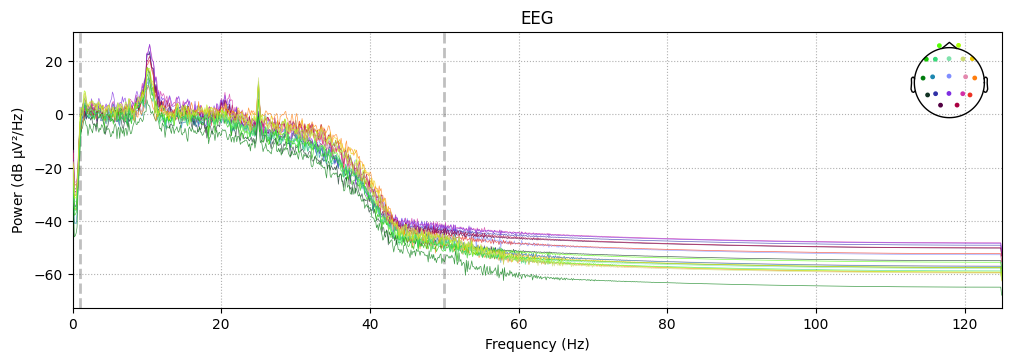

In [45]:
%matplotlib inline
sample_1020_zg = sample_1020_zg.filter(l_freq=1, h_freq=50, method='iir')
sample_1020_zg.compute_psd().plot()
plt.show()

In [46]:
n_components = list(range(8, 20))
vars = []
for n_comp in n_components:
    ica_og = mne.preprocessing.ICA(n_components=n_comp, random_state=92)
    ica_og.fit(sample_1020_og)
    explained_var_ratio = ica_og.get_explained_variance_ratio(sample_1020_og)
    vars.append(explained_var_ratio['eeg'])

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 2.1s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 9 components
Fitting ICA took 0.3s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 0.5s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 11 components
Fitting ICA took 0.7s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 12 components
Fitting ICA took 0.5s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.5s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.4s.
Fitting ICA to data using 19 

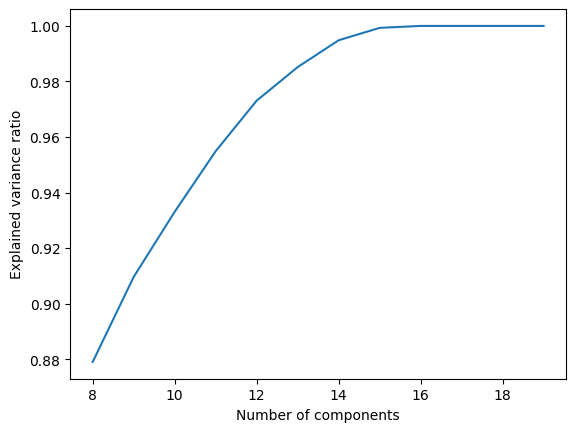

In [47]:
%matplotlib inline
plt.plot(n_components, vars)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

In [48]:
ica_og = mne.preprocessing.ICA(n_components=15, random_state=92)
ica_og.fit(sample_1020_og)
explained_var_ratio = ica_og.get_explained_variance_ratio(sample_1020_og)
print(explained_var_ratio)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 15 components
Fitting ICA took 0.3s.
{'eeg': 0.9993009637054173}


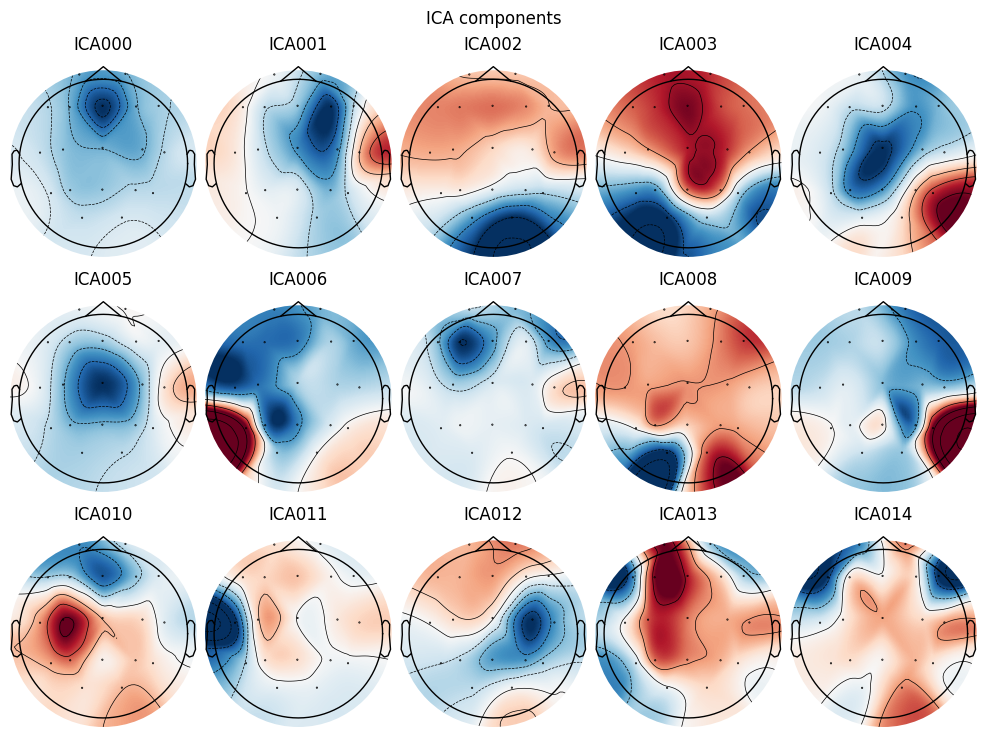

In [49]:
%matplotlib inline
ica_og.plot_components()
plt.show()

In [50]:
%matplotlib qt
ica_og.plot_sources(sample_1020_og, start=40, stop=60)
plt.show()

Creating RawArray with float64 data, n_channels=15, n_times=19500
    Range : 0 ... 19499 =      0.000 ...    77.996 secs
Ready.


In [51]:
n_components = list(range(8, 20))
vars = []
for n_comp in n_components:
    ica_zg = mne.preprocessing.ICA(n_components=n_comp, random_state=92)
    ica_zg.fit(sample_1020_zg)
    explained_var_ratio = ica_zg.get_explained_variance_ratio(sample_1020_zg)
    vars.append(explained_var_ratio['eeg'])

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 0.5s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 9 components
Fitting ICA took 0.5s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 0.4s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 11 components
Fitting ICA took 9.2s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 12 components
Fitting ICA took 0.7s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 0.5s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.5s.
Fitting ICA to data using 19 

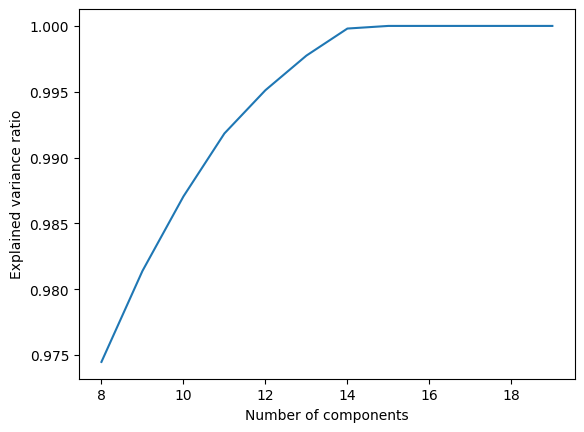

In [54]:
%matplotlib inline
plt.plot(n_components, vars)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

In [55]:
ica_zg = mne.preprocessing.ICA(n_components=14, random_state=92)
ica_zg.fit(sample_1020_zg)
explained_var_ratio = ica_zg.get_explained_variance_ratio(sample_1020_zg)
print(explained_var_ratio)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 14 components
Fitting ICA took 0.3s.
{'eeg': 0.9998007353021411}


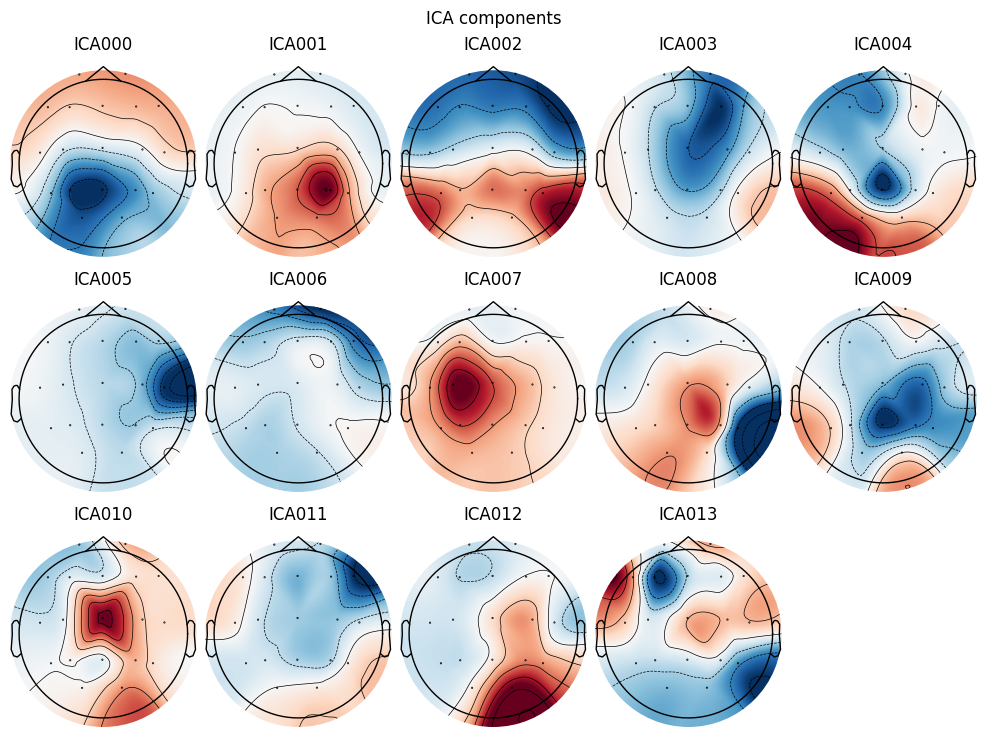

In [56]:
%matplotlib inline
ica_zg.plot_components()
plt.show()

In [57]:
%matplotlib qt
ica_zg.plot_sources(sample_1020_zg, start=20, stop=40)
plt.show()

Creating RawArray with float64 data, n_channels=14, n_times=20750
    Range : 0 ... 20749 =      0.000 ...    82.996 secs
Ready.


### Calculate DE

In [2]:
folders = os.listdir('bipolar/')
print(folders)

['control (160)', 'depressed_32-0(22)', 'depressed_32-1(44)', 'depressed_32-2(22)', 'Биполярка депресс тип (35)', 'Биполярка маниакальный тип (36)', 'мания_психи(30)', 'циклотимия (13)']


In [3]:
fldr2label = {
    'control (160)': 0,
    'Биполярка депресс тип (35)': 4,
    'Биполярка маниакальный тип (36)': 5,
    'мания_психи(30)': 6,
    'циклотимия (13)': 7,
    'depressed_32-0(22)': 1,
    'depressed_32-1(44)': 2,
    'depressed_32-2(22)': 3,
}
og_files = []
zg_files = []
og_labels = []
zg_labels = []
for fldr in folders:
    pth =  'bipolar/' + fldr
    og_pths = [x for x in os.listdir(pth) if x.lower().endswith('.edf') and ('og' in x.lower() or 'ог' in x.lower() or 'eo' in x.lower())]
    zg_pths = [x for x in os.listdir(pth) if x.lower().endswith('.edf') and ('zg' in x.lower() or 'зг' in x.lower() or 'ec' in x.lower() or 'fon' in x.lower() or 'eс' in x.lower())]
    for f in og_pths:
        og_files.append(pth + '/' + f)
        og_labels.append(fldr2label[fldr])
    for f in zg_pths:
        zg_files.append(pth + '/' + f)
        zg_labels.append(fldr2label[fldr])

In [4]:
print(f'Number of files for open eyes: {len(og_files)}')
print(f'Number of files for closed eyes: {len(zg_files)}')

Number of files for open eyes: 367
Number of files for closed eyes: 364


In [5]:
Counter(og_labels)

Counter({0: 162, 2: 45, 4: 36, 5: 36, 6: 30, 3: 23, 1: 22, 7: 13})

In [6]:
Counter(zg_labels)

Counter({0: 162, 2: 44, 5: 36, 4: 35, 6: 30, 1: 22, 3: 22, 7: 13})

#### Some exploration

In [7]:
channel_names  = []
channel_nums = []
lens = []
sampling_freqs = []

num_weird_channels = 0

for path in og_files:
    try:
        sample = mne.io.read_raw_edf(path, verbose=False, preload=True)
        channels = sample.ch_names[:19]
        channel_nums.append(len(channels))
        lens.append(len(sample) / sample.info['sfreq'])
        sampling_freqs.append(sample.info['sfreq'])
        found = False
        for ch in channel_names:
            if set(ch) == set(channels):
                found = True
                break
        if any(['chan' in ch.lower() for ch in channels]):
            num_weird_channels += 1

        if not found:
            channel_names.append(channels)
    except Exception as e:
        print(f'failed for {f} with {e}')

failed for КОТИКОВА_17_Ф60-3Ф34-0_ЗГ.EDF with could not convert string to float: '        '


In [8]:
print(num_weird_channels)

3


In [9]:
for ch in channel_names:
    print(ch)

['EEG Fp1-A1', 'EEG Fp2-A2', 'EEG F7-A1', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A2', 'EEG F8-A2', 'EEG T3-A1', 'EEG C3-A1', 'EEG Cz-A2', 'EEG C4-A2', 'EEG T4-A2', 'EEG T5-A1', 'EEG P3-A1', 'EEG Pz-A1', 'EEG P4-A2', 'EEG T6-A2', 'EEG O1-A1', 'EEG O2-A2']
['EEG Fp1-A1', 'EEG Fp2-A1', 'EEG F7-A1', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A1', 'EEG F8-A1', 'EEG T3-A1', 'EEG C3-A1', 'EEG Cz-A1', 'EEG C4-A1', 'EEG T4-A1', 'EEG T5-A1', 'EEG P3-A1', 'EEG Pz-A1', 'EEG P4-A1', 'EEG T6-A1', 'EEG O1-A1', 'EEG O2-A1']
['Fp1', 'Fp2', 'F3', 'Fz', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'Cz', 'C4', 'T5', 'T6', 'P3', 'Pz', 'P4', 'O1', 'O2']
['EEG Fp2-A1', 'EEG F7-A1', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A1', 'EEG F8-A1', 'EEG T3-A1', 'EEG C3-A1', 'EEG Cz-A1', 'EEG C4-A1', 'EEG T4-A1', 'EEG T5-A1', 'EEG P3-A1', 'EEG Pz-A1', 'EEG P4-A1', 'EEG O1-A1', 'EEG O2-A1', 'EEG A2-A1', 'EEG A1-N']
['EEG Fp1-A1', 'EEG Fp2-A1', 'EEG F7-A1', 'EEG F3-A1', 'EEG Fz-A1', 'EEG F4-A1', 'EEG F8-A1', 'EEG T3-A1', 'EEG C3-A1', 'EEG Cz-A1', 'E

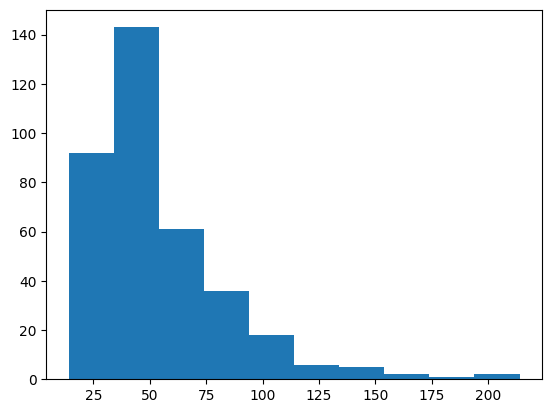

In [10]:
%matplotlib inline
plt.hist(lens)
plt.show()

In [11]:
print(min(lens))
print(np.mean(lens))
print(np.median(lens))
print(max(lens))

14.0
52.778688524590166
44.0
214.0


In [12]:
channel_names  = []
channel_nums = []
lens = []
sampling_freqs = []

num_weird_channels = 0

for path in zg_files:
    try:
        sample = mne.io.read_raw_edf(path, verbose=False, preload=True)
        channels = sample.ch_names[:19]
        channel_nums.append(len(channels))
        lens.append(len(sample) / sample.info['sfreq'])
        sampling_freqs.append(sample.info['sfreq'])
        found = False
        for ch in channel_names:
            if set(ch) == set(channels):
                found = True
                break
        if any(['chan' in ch.lower() for ch in channels]):
            num_weird_channels += 1
            print(path)
        if not found:
            channel_names.append(channels)
    except Exception as e:
        print(f'failed for {f} with {e}')

bipolar/мания_психи(30)/BeUV_f35_F25-2_No_T_P_zg.edf
bipolar/мания_психи(30)/CaA_f38_f23-1_f25-2_Ep_No_zg.edf
bipolar/мания_психи(30)/DoAA_m29_f25-0_f25-2_Ng_Li_Na_P_zg.edf


In [13]:
print(min(lens))
print(np.mean(lens))
print(np.median(lens))
print(max(lens))

15.0
72.17857142857143
67.0
285.0


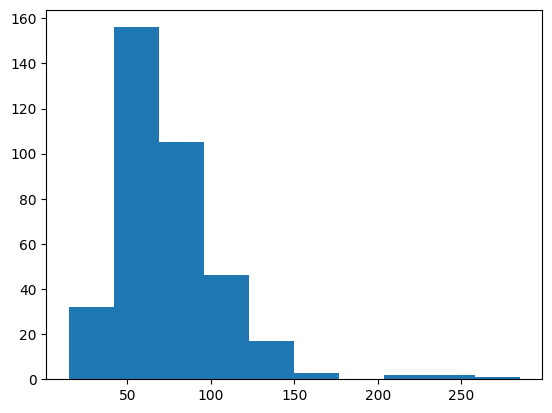

In [14]:
%matplotlib inline
plt.hist(lens)
plt.show()

Using matplotlib as 2D backend.


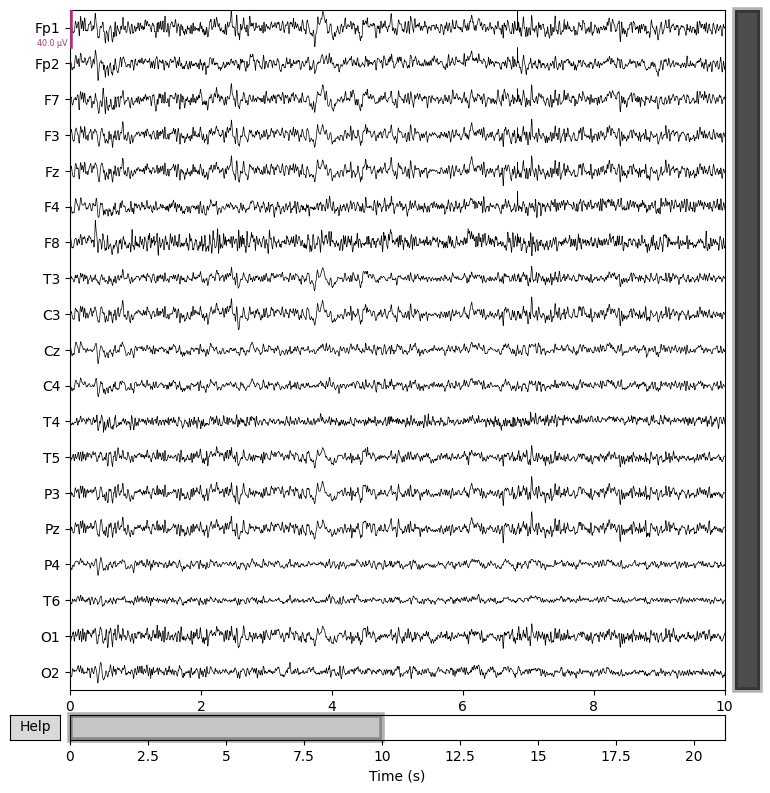

In [15]:
%matplotlib qt

sample = mne.io.read_raw_edf('bipolar/Биполярка маниакальный тип (36)/высоких_алексей_вл_45_мания_ог.edf', verbose=False, preload=True)
sample.plot()

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


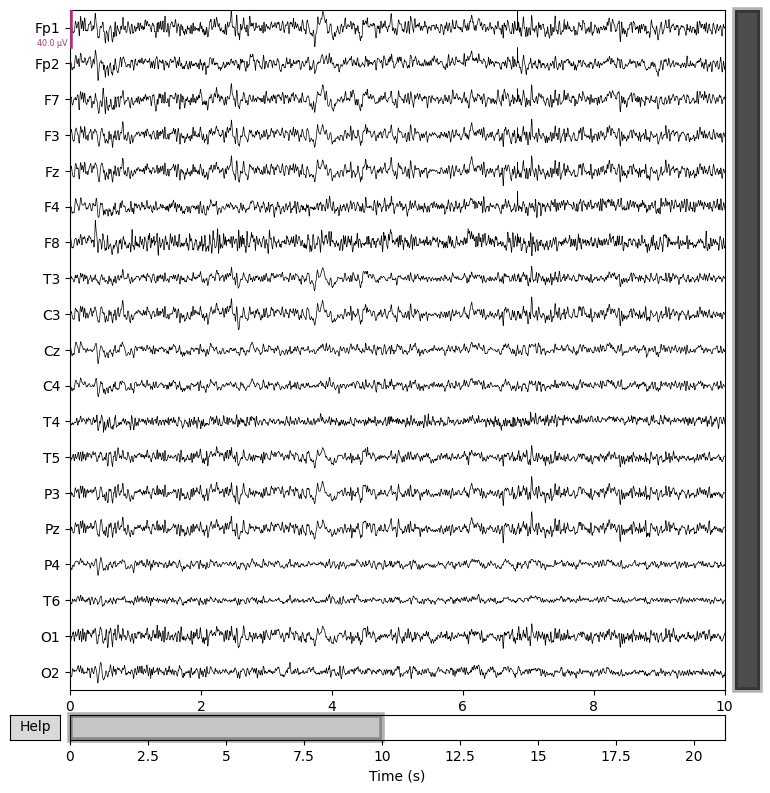

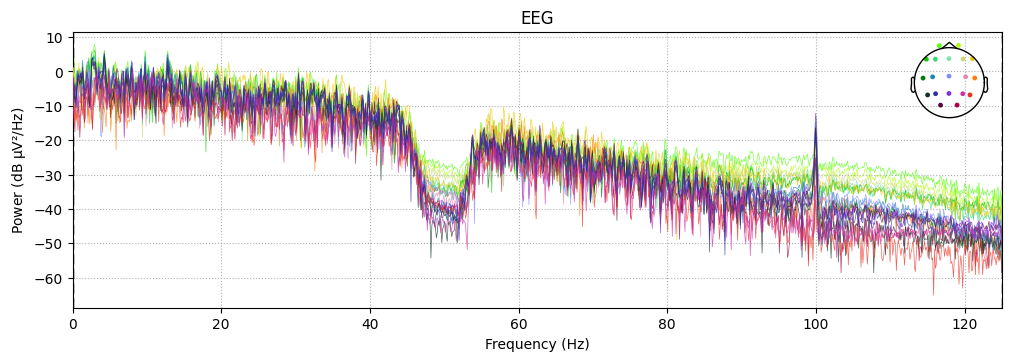

Channels marked as bad:
none


In [16]:
%matplotlib inline
# channel_names = {x: x[4:7].replace('-', '') for x in sample_og.ch_names if x.lower() not in ['status', 'events', 'event', 'status-0', 'status-1', 'ma dva(vstr)', 'markers', 'eeg a1-a2', 'eeg a1-n']}
# channel_names = {x: x[4:] for x in sample.ch_names if x != 'Status'}
# print(channel_names)

sample_1020_og = sample.copy()
# sample_1020_og.drop_channels(['event'])
# sample_1020_og.rename_channels(channel_names)
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
sample_1020_og = sample_1020_og.set_montage(ten_twenty_montage)
sample_1020_og.compute_psd().plot()


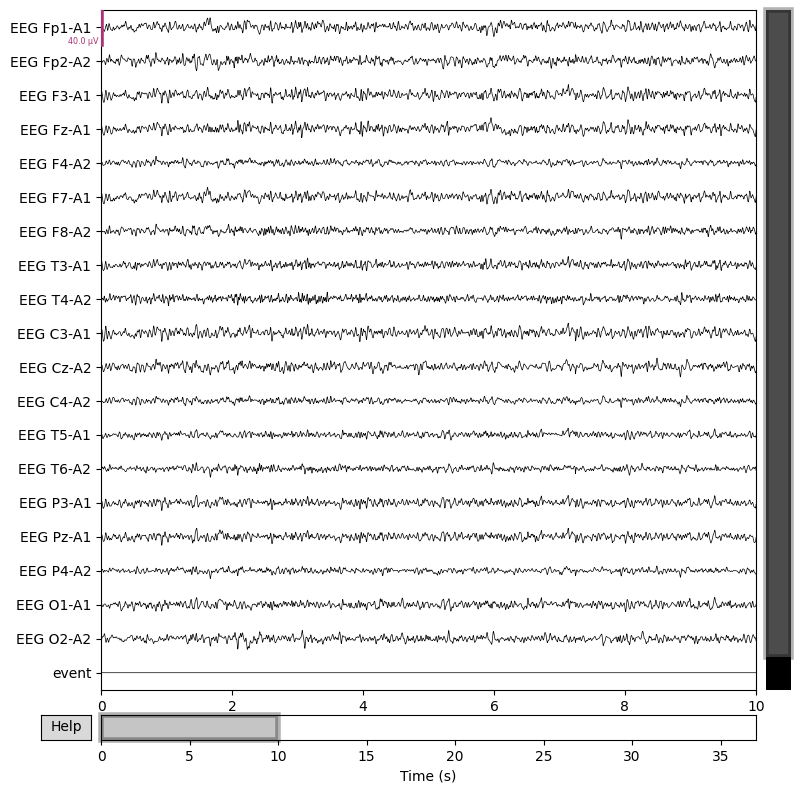

In [17]:
%matplotlib qt

sample = mne.io.read_raw_edf('bipolar\мания_психи(30)\XeUV_f35_F25-2_No_T_P_og.edf', verbose=False, preload=True)
sample.plot()

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


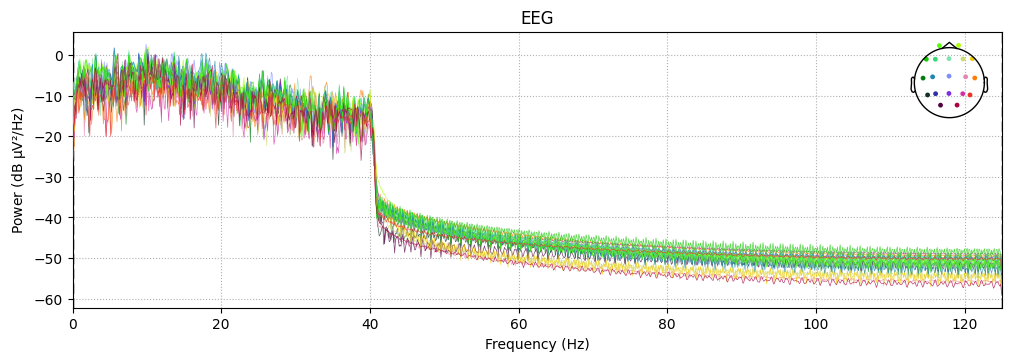

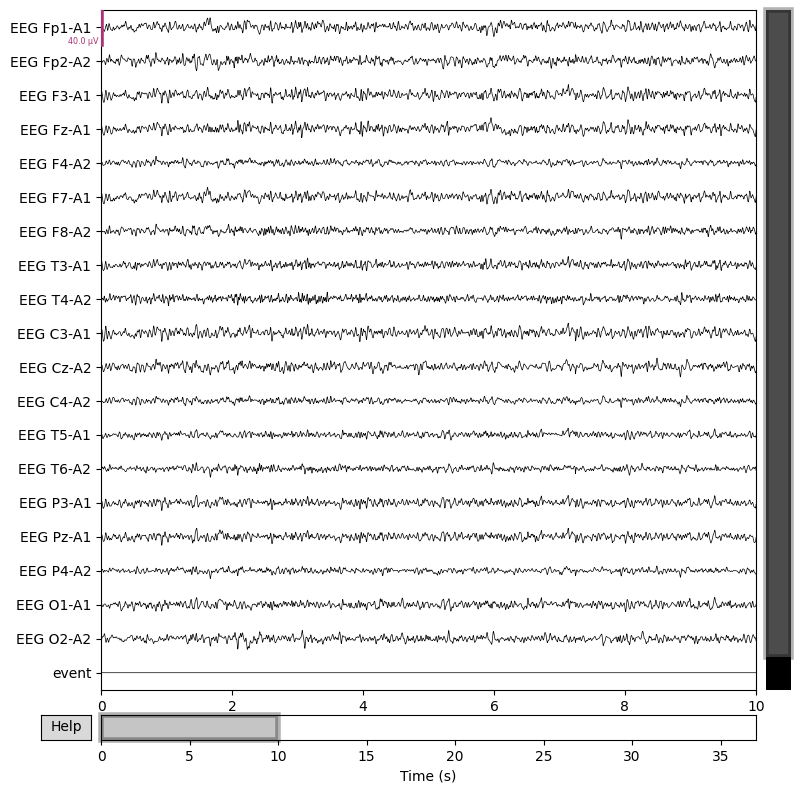

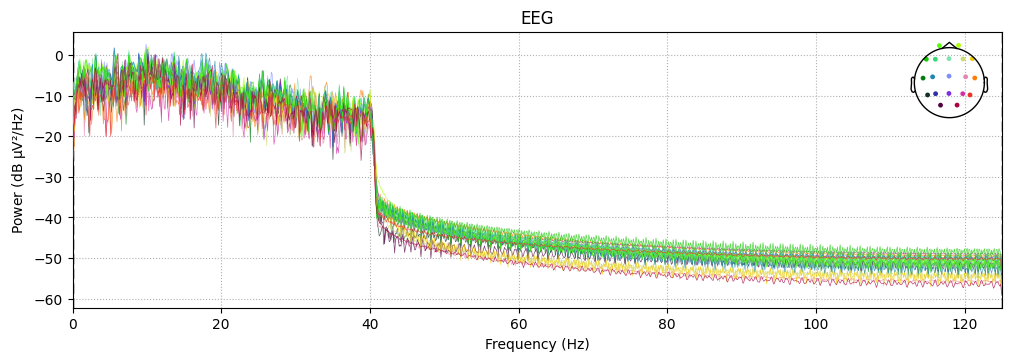

Channels marked as bad:
none


In [18]:
%matplotlib inline
channel_names = {x: x[4:7].replace('-', '') for x in sample.ch_names if x.lower() not in ['status', 'events', 'event', 'status-0', 'status-1', 'ma dva(vstr)', 'markers', 'eeg a1-a2', 'eeg a1-n']}
# channel_names = {x: x[4:] for x in sample.ch_names if x != 'Status'}
# print(channel_names)

sample_1020_og = sample.copy()
sample_1020_og.drop_channels(['event'])
sample_1020_og.rename_channels(channel_names)
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
sample_1020_og = sample_1020_og.set_montage(ten_twenty_montage)
sample_1020_og.compute_psd().plot()


#### Extract DE features

In [19]:
def compute_features(data, s_freq=250, pairs=[], n_channels=19):
    freq_bands = np.array([1, 4, 8, 13, 30])

    psd, freqs = mne.time_frequency.psd_array_welch(data, sfreq=s_freq, fmin=1, fmax=30, n_fft=512, n_per_seg=s_freq, window='hann', average=None, verbose=False)

    # compute ES and DE
    differential_entropy = np.zeros((psd.shape[0], len(freq_bands) - 1, psd.shape[2]))
    energy_spectrum = np.zeros((psd.shape[0], len(freq_bands) - 1, psd.shape[2]))

    for i in range(n_channels):
        for j in range(len(freq_bands) - 1):
            band_indices = np.where((freqs >= freq_bands[j]) & (freqs < freq_bands[j+1]))[0]
            if len(band_indices) > 0:
                band_psd = psd[i, band_indices]
                band_variance = np.mean(band_psd, axis=0)
                differential_entropy[i, j] = 0.5 * np.log(2 * np.pi * np.e * band_variance)
                energy_spectrum[i, j] = band_variance
    # compute asymmetry features
    left = differential_entropy[[x[0] for x in pairs]]
    right = differential_entropy[[x[1] for x in pairs]]
    dasm = left - right
    rasm = left / right
    return energy_spectrum, differential_entropy, dasm, rasm

In [20]:
# calculate features for the first 14s of each recording
n_channels = 19

cleaned_labels_og = []
es_features_og = []
de_features_og = []
dasm_features_og = []
rasm_features_og = []

name_pairs = [('Fp1', 'Fp2'), ('F3', 'F4'), ('F7', 'F8'), ('C3', 'C4'), ('T3', 'T4'), ('P3', 'P4'), ('T5', 'T6'), ('O1', 'O2')]
idx_pairs = [(0, 1), (2, 4), (5, 6), (9, 11), (7, 8), (14, 16), (12, 13), (17, 18)]
channels2use = ['Fp1', 'Fp2', 'F3', 'Fz', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'Cz', 'C4', 'T5', 'T6', 'P3', 'Pz', 'P4', 'O1', 'O2']

for i in range(len(og_files)):
    try:
        path = og_files[i]
        sample = mne.io.read_raw_edf(path, verbose=False, preload=True)
        # skip faulty data for now
        if 'chan' in sample.ch_names[0].lower():
            continue

        sample = sample.filter(l_freq=1, h_freq=30, method='iir', verbose=False)
        channels = sample.ch_names
        to_drop = channels[19:]
        sample.drop_channels(to_drop)

        new_idx = []
        skip = False
        for ch in channels2use:
            found = False
            for k in range(19):
                if ch in channels[k]:
                    new_idx.append(k)
                    found = True
                    break
            if not found:
                skip = True
                break
        if skip:
            continue

        s_freq = int(sample.info['sfreq'])
        data = sample.get_data()[new_idx, :int(14 * s_freq)]

        es, de, dasm, rasm = compute_features(data, s_freq, idx_pairs)
        es_features_og.append(es)
        de_features_og.append(de)
        dasm_features_og.append(dasm)
        rasm_features_og.append(rasm)
        cleaned_labels_og.append(og_labels[i])
    except Exception as e:
        print(e)
        print(path)

could not convert string to float: '        '
bipolar/control (160)/Skopincev_20_EO_free.edf


In [21]:
# calculate features for the first 14s of each recording
n_channels = 19

cleaned_labels_zg = []
es_features_zg = []
de_features_zg = []
dasm_features_zg = []
rasm_features_zg = []

name_pairs = [('Fp1', 'Fp2'), ('F3', 'F4'), ('F7', 'F8'), ('C3', 'C4'), ('T3', 'T4'), ('P3', 'P4'), ('T5', 'T6'), ('O1', 'O2')]
idx_pairs = [(0, 1), (2, 4), (5, 6), (9, 11), (7, 8), (14, 16), (12, 13), (17, 18)]
channels2use = ['Fp1', 'Fp2', 'F3', 'Fz', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'Cz', 'C4', 'T5', 'T6', 'P3', 'Pz', 'P4', 'O1', 'O2']

for i in range(len(zg_files)):
    try:
        path = zg_files[i]
        sample = mne.io.read_raw_edf(path, verbose=False, preload=True)
        # skip faulty data for now
        if 'chan' in sample.ch_names[0].lower():
            continue

        sample = sample.filter(l_freq=1, h_freq=30, method='iir', verbose=False)
        channels = sample.ch_names
        to_drop = channels[19:]

        new_idx = []
        skip = False
        for ch in channels2use:
            found = False
            for k in range(19):
                if ch in channels[k]:
                    new_idx.append(k)
                    found = True
                    break
            if not found:
                skip = True
                break
        if skip:
            continue

        s_freq = int(sample.info['sfreq'])
        data = sample.get_data()[new_idx, :int(14 * s_freq)]

        es, de, dasm, rasm = compute_features(data, s_freq, idx_pairs)
        es_features_zg.append(es)
        de_features_zg.append(de)
        dasm_features_zg.append(dasm)
        rasm_features_zg.append(rasm)
        cleaned_labels_zg.append(zg_labels[i])
    except Exception as e:
        print(e)
        print(path)

In [22]:
es_features_og = np.array(es_features_og)
de_features_og = np.array(de_features_og)
dasm_features_og = np.array(dasm_features_og)
rasm_features_og = np.array(rasm_features_og)
es_features_zg = np.array(es_features_zg)
de_features_zg = np.array(de_features_zg)
dasm_features_zg = np.array(dasm_features_zg)
rasm_features_zg = np.array(rasm_features_zg)

cleaned_labels_og = np.array(cleaned_labels_og)
cleaned_labels_zg = np.array(cleaned_labels_zg)

#### only open eyes

In [24]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_og))), cleaned_labels_og)):
    X_train = np.concatenate((es_features_og[train].reshape(-1, 19 * 4 * 14), de_features_og[train].reshape(-1, 19 * 4 * 14), dasm_features_og[train].reshape(-1, 8 * 4 * 14), rasm_features_og[train].reshape(-1, 8 * 4 * 14)), axis=1)
    X_test = np.concatenate((es_features_og[test].reshape(-1, 19 * 4 * 14), de_features_og[test].reshape(-1, 19 * 4 * 14), dasm_features_og[test].reshape(-1, 8 * 4 * 14), rasm_features_og[test].reshape(-1, 8 * 4 * 14)), axis=1)
    y_train = cleaned_labels_og[train]
    y_test = cleaned_labels_og[test]
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    print(confusion_matrix(y_test, preds))
    print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[[29  0  0  0  3  0  0  0]
 [ 1  0  2  0  0  0  1  0]
 [ 4  0  2  0  2  1  0  0]
 [ 2  0  0  3  0  0  0  0]
 [ 1  0  2  0  2  0  2  0]
 [ 1  0  2  1  0  2  1  0]
 [ 1  0  0  1  1  3  0  0]
 [ 0  0  0  0  1  0  0  1]]

[[26  0  3  0  2  1  0  0]
 [ 2  2  0  0  0  0  0  0]
 [ 4  0  2  0  2  0  1  0]
 [ 2  0  0  0  2  1  0  0]
 [ 1  0  0  1  4  1  0  0]
 [ 5  0  0  0  0  2  0  0]
 [ 2  0  0  0  0  4  0  0]
 [ 1  0  0  0  0  0  0  1]]

[[24  0  3  2  1  0  1  1]
 [ 1  1  1  0  1  0  0  0]
 [ 5  1  2  1  0  0  0  0]
 [ 1  0  1  2  1  0  0  0]
 [ 0  0  4  0  0  1  1  1]
 [ 2  1  1  0  1  1  1  0]
 [ 0  0  0  0  3  2  0  0]
 [ 2  0  0  0  0  0  0  1]]

[[24  1  2  1  3  0  0  0]
 [ 4  0  0  0  1  0  0  0]
 [ 3  0  0  2  1  1  2  0]
 [ 0  0  2  2  0  0  0  0]
 [ 2  1  1  2  2  0  0  0]
 [ 3  1  0  0  0  1  2  0]
 [ 2  1  1  1  0  0  0  0]
 [ 1  0  0  0  0  0  1  1]]

[[24  0  3  0  3  0  0  1]
 [ 3  0  0  1  1  0  0  0]
 [ 3  1  1  0  1  1  2  0]
 [ 0  0  1  1  1  0  1  0]
 [ 4  0  1  0  1  1 

In [25]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_og))), cleaned_labels_og)):
    X_train = np.concatenate((es_features_og[train].reshape(-1, 19 * 4 * 14), de_features_og[train].reshape(-1, 19 * 4 * 14), dasm_features_og[train].reshape(-1, 8 * 4 * 14), rasm_features_og[train].reshape(-1, 8 * 4 * 14)), axis=1)
    X_test = np.concatenate((es_features_og[test].reshape(-1, 19 * 4 * 14), de_features_og[test].reshape(-1, 19 * 4 * 14), dasm_features_og[test].reshape(-1, 8 * 4 * 14), rasm_features_og[test].reshape(-1, 8 * 4 * 14)), axis=1)
    y_train = cleaned_labels_og[train]
    y_test = cleaned_labels_og[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    print(confusion_matrix(y_test, preds))
    print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[[29  1  0  0  1  1  0  0]
 [ 0  1  0  1  0  1  1  0]
 [ 2  0  4  0  2  1  0  0]
 [ 0  1  0  2  2  0  0  0]
 [ 1  0  3  1  1  1  0  0]
 [ 1  0  2  1  0  0  3  0]
 [ 1  0  1  0  0  1  3  0]
 [ 0  0  0  0  0  0  0  2]]

[[30  0  1  1  0  0  0  0]
 [ 2  1  0  0  0  1  0  0]
 [ 1  0  4  0  2  0  2  0]
 [ 1  0  0  0  2  2  0  0]
 [ 0  0  0  0  5  1  1  0]
 [ 1  0  0  1  1  2  2  0]
 [ 2  0  0  0  1  3  0  0]
 [ 1  0  0  0  0  0  0  1]]

[[30  0  0  1  0  0  1  0]
 [ 2  1  1  0  0  0  0  0]
 [ 2  2  2  0  2  1  0  0]
 [ 2  0  0  1  2  0  0  0]
 [ 2  0  1  1  2  0  0  1]
 [ 2  1  1  0  1  0  2  0]
 [ 1  0  0  0  0  2  2  0]
 [ 1  0  0  0  1  0  0  1]]

[[28  1  2  0  0  0  0  0]
 [ 1  3  0  1  0  0  0  0]
 [ 2  0  2  0  1  2  1  1]
 [ 1  0  0  1  0  2  0  0]
 [ 3  0  1  2  2  0  0  0]
 [ 2  0  0  1  0  2  2  0]
 [ 0  1  1  0  0  2  1  0]
 [ 2  0  0  0  0  0  0  1]]

[[29  0  1  0  1  0  0  0]
 [ 2  1  1  0  0  1  0  0]
 [ 5  1  3  0  0  0  0  0]
 [ 1  0  1  2  0  0  0  0]
 [ 0  0  1  0  3  0 

without asymmetry features

In [26]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_og))), cleaned_labels_og)):
    X_train = np.concatenate((es_features_og[train].reshape(-1, 19 * 4 * 14), de_features_og[train].reshape(-1, 19 * 4 * 14)), axis=1)
    X_test = np.concatenate((es_features_og[test].reshape(-1, 19 * 4 * 14), de_features_og[test].reshape(-1, 19 * 4 * 14)), axis=1)
    y_train = cleaned_labels_og[train]
    y_test = cleaned_labels_og[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    # print(confusion_matrix(y_test, preds))
    # print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[0.477559205500382, 0.36822030199877803, 0.37347385301152425, 0.37908945629533863, 0.40092203548085903]
avg macro-f1: 0.39985297045737644
[0.5833333333333334, 0.5416666666666666, 0.5694444444444444, 0.5277777777777778, 0.5555555555555556]
avg micro-f1: 0.5555555555555556


without energy spectrum

In [27]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_og))), cleaned_labels_og)):
    X_train = np.concatenate((de_features_og[train].reshape(-1, 19 * 4 * 14), dasm_features_og[train].reshape(-1, 8 * 4 * 14), rasm_features_og[train].reshape(-1, 8 * 4 * 14)), axis=1)
    X_test = np.concatenate((de_features_og[test].reshape(-1, 19 * 4 * 14), dasm_features_og[test].reshape(-1, 8 * 4 * 14), rasm_features_og[test].reshape(-1, 8 * 4 * 14)), axis=1)
    y_train = cleaned_labels_og[train]
    y_test = cleaned_labels_og[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    # print(confusion_matrix(y_test, preds))
    # print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[0.4501174264332159, 0.4125992063492063, 0.33289897039897043, 0.3926767676767677, 0.4351370851370851]
avg macro-f1: 0.40468589119904913
[0.5833333333333334, 0.5972222222222222, 0.5416666666666666, 0.5555555555555556, 0.5833333333333334]
avg micro-f1: 0.5722222222222222


only de

In [28]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_og))), cleaned_labels_og)):
    X_train = de_features_og[train].reshape(-1, 19 * 4 * 14)
    X_test = de_features_og[test].reshape(-1, 19 * 4 * 14)
    y_train = cleaned_labels_og[train]
    y_test = cleaned_labels_og[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    # print(confusion_matrix(y_test, preds))
    # print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[0.477559205500382, 0.36822030199877803, 0.37347385301152425, 0.37908945629533863, 0.40092203548085903]
avg macro-f1: 0.39985297045737644
[0.5833333333333334, 0.5416666666666666, 0.5694444444444444, 0.5277777777777778, 0.5555555555555556]
avg micro-f1: 0.5555555555555556


only es

In [29]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_og))), cleaned_labels_og)):
    X_train = es_features_og[train].reshape(-1, 19 * 4 * 14)
    X_test = es_features_og[test].reshape(-1, 19 * 4 * 14)
    y_train = cleaned_labels_og[train]
    y_test = cleaned_labels_og[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    # print(confusion_matrix(y_test, preds))
    # print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[0.006756756756756757, 0.006756756756756757, 0.016233766233766232, 0.025, 0.025]
avg macro-f1: 0.01594945594945595
[0.027777777777777776, 0.027777777777777776, 0.06944444444444445, 0.1111111111111111, 0.1111111111111111]
avg micro-f1: 0.06944444444444445


by bands

In [30]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for j in range(4):
    print('BAND', j)
    for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_og))), cleaned_labels_og)):
        X_train = np.concatenate((de_features_og[train, :, j].reshape(-1, 19 * 14), dasm_features_og[train, :, j].reshape(-1, 8 * 14), rasm_features_og[train, :, j].reshape(-1, 8 * 14)), axis=1)
        X_test = np.concatenate((de_features_og[test, :, j].reshape(-1, 19 * 14), dasm_features_og[test, :, j].reshape(-1, 8 * 14), rasm_features_og[test, :, j].reshape(-1, 8 * 14)), axis=1)
        y_train = cleaned_labels_og[train]
        y_test = cleaned_labels_og[test]
        clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
        f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
        # print(confusion_matrix(y_test, preds))
        # print()

    print(f1_scores_macro)
    print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
    print(f1_scores_micro)
    print(f'avg micro-f1: {np.mean(f1_scores_micro)}')
    print('--------------------------------------------')

BAND 0
[0.29301941228170736, 0.28270384240652785, 0.3184434968017057, 0.2819844470046083, 0.3789826127819549]
avg macro-f1: 0.3110267622553008
[0.4305555555555556, 0.4444444444444444, 0.4861111111111111, 0.4027777777777778, 0.4722222222222222]
avg micro-f1: 0.44722222222222224
--------------------------------------------
BAND 1
[0.29301941228170736, 0.28270384240652785, 0.3184434968017057, 0.2819844470046083, 0.3789826127819549, 0.24122405372405373, 0.3392324093816631, 0.2738280324567638, 0.2777805527805528, 0.3412746610115031]
avg macro-f1: 0.3028473520631041
[0.4305555555555556, 0.4444444444444444, 0.4861111111111111, 0.4027777777777778, 0.4722222222222222, 0.3888888888888889, 0.4722222222222222, 0.4444444444444444, 0.3611111111111111, 0.4444444444444444]
avg micro-f1: 0.43472222222222223
--------------------------------------------
BAND 2
[0.29301941228170736, 0.28270384240652785, 0.3184434968017057, 0.2819844470046083, 0.3789826127819549, 0.24122405372405373, 0.3392324093816631, 0.

by zones

In [31]:
zone2ids = {'frontal': [0, 1, 2, 3, 4, 5, 6], 'temporal': [7, 8, 12, 13], 'central': [9, 10, 11], 'parietal': [14, 15, 16], 'occipital': [17, 18]}
zone2pair = {'frontal': [0, 1, 2], 'temporal': [4, 6], 'central': [3], 'parietal': [5], 'occipital': [7]}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for zone, ids in zone2ids.items():
    print(f'ZONE: {zone}')
    for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_og))), cleaned_labels_og)):
        n = len(ids)
        n_pairs = len(zone2pair[zone])
        X_train = np.concatenate((es_features_og[train][:, ids].reshape(-1, n * 4 * 14), de_features_og[train][:, ids].reshape(-1, n * 4 * 14), dasm_features_og[train][:, zone2pair[zone]].reshape(-1, n_pairs * 4 * 14), rasm_features_og[train][:, zone2pair[zone]].reshape(-1, n_pairs * 4 * 14)), axis=1)
        X_test = np.concatenate((es_features_og[test][:, ids].reshape(-1, n * 4 * 14), de_features_og[test][:, ids].reshape(-1, n * 4 * 14), dasm_features_og[test][:, zone2pair[zone]].reshape(-1, n_pairs * 4 * 14), rasm_features_og[test][:, zone2pair[zone]].reshape(-1, n_pairs * 4 * 14)), axis=1)
        y_train = cleaned_labels_og[train]
        y_test = cleaned_labels_og[test]
        clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
        f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
        # print(confusion_matrix(y_test, preds))
        # print()

    print(f1_scores_macro)
    print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
    print(f1_scores_micro)
    print(f'avg micro-f1: {np.mean(f1_scores_micro)}')
    print('--------------------------------------------')

ZONE: frontal
[0.38175479491268965, 0.3286796536796537, 0.27024353120243527, 0.26147504456327986, 0.3556112596553773]
avg macro-f1: 0.31955285680268714
[0.4861111111111111, 0.4583333333333333, 0.4722222222222222, 0.4027777777777778, 0.4861111111111111]
avg micro-f1: 0.4611111111111111
--------------------------------------------
ZONE: temporal
[0.38175479491268965, 0.3286796536796537, 0.27024353120243527, 0.26147504456327986, 0.3556112596553773, 0.3091145833333333, 0.2745927318295739, 0.30299019607843136, 0.34374290108486766, 0.34674688057041]
avg macro-f1: 0.31749515769100517
[0.4861111111111111, 0.4583333333333333, 0.4722222222222222, 0.4027777777777778, 0.4861111111111111, 0.5, 0.4305555555555556, 0.5277777777777778, 0.5, 0.5138888888888888]
avg micro-f1: 0.47777777777777786
--------------------------------------------
ZONE: central
[0.38175479491268965, 0.3286796536796537, 0.27024353120243527, 0.26147504456327986, 0.3556112596553773, 0.3091145833333333, 0.2745927318295739, 0.302990

bigger classes: bipolar, depression, mania, cyclothymia

In [32]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

label_map = {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 4}

def map_labels(labels):
    new_labels = np.zeros(len(labels))
    for i in range(len(labels)):
        new_labels[i] = label_map[labels[i]]
    return new_labels

cleaned_labels_og_tmp = map_labels(cleaned_labels_og)

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_og_tmp))), cleaned_labels_og_tmp)):
    X_train = np.concatenate((es_features_og[train].reshape(-1, 19 * 4 * 14), de_features_og[train].reshape(-1, 19 * 4 * 14), dasm_features_og[train].reshape(-1, 8 * 4 * 14), rasm_features_og[train].reshape(-1, 8 * 4 * 14)), axis=1)
    X_test = np.concatenate((es_features_og[test].reshape(-1, 19 * 4 * 14), de_features_og[test].reshape(-1, 19 * 4 * 14), dasm_features_og[test].reshape(-1, 8 * 4 * 14), rasm_features_og[test].reshape(-1, 8 * 4 * 14)), axis=1)
    y_train = cleaned_labels_og_tmp[train]
    y_test = cleaned_labels_og_tmp[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    print(confusion_matrix(y_test, preds))
    print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[[26  2  3  1  0]
 [ 3  4  4  2  0]
 [ 2  4 11  2  0]
 [ 0  0  5  1  0]
 [ 1  0  0  0  1]]

[[28  2  2  0  0]
 [ 6  4  3  0  0]
 [ 4  3  9  2  1]
 [ 2  2  0  2  0]
 [ 0  0  1  0  1]]

[[27  1  3  0  1]
 [ 1  7  5  0  0]
 [ 0  3 15  1  0]
 [ 0  1  4  0  0]
 [ 1  1  1  0  0]]

[[22  2  6  0  1]
 [ 3  5  4  2  0]
 [ 2  5 12  0  0]
 [ 0  0  4  1  0]
 [ 1  1  0  0  1]]

[[24  6  1  0  0]
 [ 1  6  6  1  0]
 [ 5  2 10  1  1]
 [ 1  1  3  0  0]
 [ 1  0  0  0  2]]

[0.5034937888198758, 0.5081045751633987, 0.4124010624882617, 0.4598932831136221, 0.4710370089680434]
avg macro-f1: 0.47098594371064034
[0.5972222222222222, 0.6111111111111112, 0.6805555555555556, 0.5694444444444444, 0.5833333333333334]
avg micro-f1: 0.6083333333333334


#### only closed eyes

In [33]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_zg))), cleaned_labels_zg)):
    X_train = np.concatenate((es_features_zg[train].reshape(-1, 19 * 4 * 14), de_features_zg[train].reshape(-1, 19 * 4 * 14), dasm_features_zg[train].reshape(-1, 8 * 4 * 14), rasm_features_zg[train].reshape(-1, 8 * 4 * 14)), axis=1)
    X_test = np.concatenate((es_features_zg[test].reshape(-1, 19 * 4 * 14), de_features_zg[test].reshape(-1, 19 * 4 * 14), dasm_features_zg[test].reshape(-1, 8 * 4 * 14), rasm_features_zg[test].reshape(-1, 8 * 4 * 14)), axis=1)
    y_train = cleaned_labels_zg[train]
    y_test = cleaned_labels_zg[test]
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    print(confusion_matrix(y_test, preds))
    print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[[19  0  2  0  2  7  2  0]
 [ 1  1  1  0  0  1  1  0]
 [ 1  1  2  0  0  2  2  0]
 [ 3  0  1  1  0  0  0  0]
 [ 0  0  3  1  2  0  1  0]
 [ 0  1  0  0  0  2  4  0]
 [ 1  0  0  1  0  1  2  0]
 [ 1  0  0  0  0  0  0  2]]

[[30  0  1  0  0  0  1  0]
 [ 1  0  1  1  1  0  0  0]
 [ 2  0  4  1  2  0  0  0]
 [ 3  1  0  0  0  1  0  0]
 [ 0  0  3  1  3  0  0  0]
 [ 0  0  1  3  2  1  0  0]
 [ 2  1  0  0  0  2  0  0]
 [ 2  0  0  0  0  0  0  1]]

[[29  0  1  2  0  0  0  0]
 [ 3  1  0  0  0  0  0  0]
 [ 0  0  3  3  1  1  1  0]
 [ 1  0  0  2  0  0  1  0]
 [ 5  0  0  0  1  0  0  1]
 [ 2  2  2  0  0  0  2  0]
 [ 2  0  0  0  1  0  2  0]
 [ 2  0  0  0  0  0  0  1]]

[[25  1  1  0  2  2  0  1]
 [ 2  1  0  1  0  0  0  0]
 [ 5  1  1  0  0  2  0  0]
 [ 0  0  3  0  1  0  0  0]
 [ 3  1  0  2  1  0  0  0]
 [ 1  0  1  0  2  1  2  0]
 [ 2  0  1  1  0  2  0  0]
 [ 1  0  0  0  0  0  0  1]]

[[26  0  3  0  1  1  0  0]
 [ 2  0  3  0  0  0  0  0]
 [ 3  0  1  1  1  1  2  0]
 [ 1  0  1  1  0  0  1  0]
 [ 2  0  2  0  2  0 

In [34]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_zg))), cleaned_labels_zg)):
    X_train = np.concatenate((es_features_zg[train].reshape(-1, 19 * 4 * 14), de_features_zg[train].reshape(-1, 19 * 4 * 14), dasm_features_zg[train].reshape(-1, 8 * 4 * 14), rasm_features_zg[train].reshape(-1, 8 * 4 * 14)), axis=1)
    X_test = np.concatenate((es_features_zg[test].reshape(-1, 19 * 4 * 14), de_features_zg[test].reshape(-1, 19 * 4 * 14), dasm_features_zg[test].reshape(-1, 8 * 4 * 14), rasm_features_zg[test].reshape(-1, 8 * 4 * 14)), axis=1)
    y_train = cleaned_labels_zg[train]
    y_test = cleaned_labels_zg[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    print(confusion_matrix(y_test, preds))
    print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[[28  0  1  1  1  0  1  0]
 [ 1  2  1  0  0  0  1  0]
 [ 1  0  5  0  0  2  0  0]
 [ 2  0  1  2  0  0  0  0]
 [ 1  0  4  1  1  0  0  0]
 [ 1  0  0  0  0  4  2  0]
 [ 0  0  1  0  1  1  2  0]
 [ 2  0  0  0  0  0  0  1]]

[[32  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  1  0  0]
 [ 2  0  2  0  3  1  1  0]
 [ 0  1  1  2  1  0  0  0]
 [ 0  0  1  2  4  0  0  0]
 [ 1  0  2  0  1  3  0  0]
 [ 0  1  1  0  1  0  2  0]
 [ 0  0  0  0  0  0  0  3]]

[[31  1  0  0  0  0  0  0]
 [ 1  3  0  0  0  0  0  0]
 [ 1  1  1  1  2  1  2  0]
 [ 1  0  1  1  1  0  0  0]
 [ 3  0  0  0  1  1  1  1]
 [ 2  0  1  0  0  3  2  0]
 [ 1  0  0  0  0  2  2  0]
 [ 1  0  0  0  1  0  0  1]]

[[30  0  0  1  0  1  0  0]
 [ 1  2  0  1  0  0  0  0]
 [ 3  0  5  0  1  0  0  0]
 [ 0  0  2  0  1  1  0  0]
 [ 1  0  1  2  2  1  0  0]
 [ 2  0  0  0  1  2  2  0]
 [ 0  0  0  0  0  5  1  0]
 [ 0  0  0  1  0  0  0  1]]

[[27  0  1  1  0  1  0  1]
 [ 1  0  2  0  0  1  0  1]
 [ 2  1  2  1  2  0  1  0]
 [ 1  0  1  2  0  0  0  0]
 [ 1  0  0  0  5  0 

without asymmetry features

In [35]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_zg))), cleaned_labels_zg)):
    X_train = np.concatenate((es_features_zg[train].reshape(-1, 19 * 4 * 14), de_features_zg[train].reshape(-1, 19 * 4 * 14)), axis=1)
    X_test = np.concatenate((es_features_zg[test].reshape(-1, 19 * 4 * 14), de_features_zg[test].reshape(-1, 19 * 4 * 14)), axis=1)
    y_train = cleaned_labels_zg[train]
    y_test = cleaned_labels_zg[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[0.4613646973941092, 0.4942982456140351, 0.4241312582345191, 0.421497601754406, 0.4068709643481806]
avg macro-f1: 0.44163255346904995
[0.6111111111111112, 0.6527777777777778, 0.5972222222222222, 0.5633802816901409, 0.6056338028169014]
avg micro-f1: 0.6060250391236307


without energy spectrum

In [36]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_zg))), cleaned_labels_zg)):
    X_train = np.concatenate((de_features_zg[train].reshape(-1, 19 * 4 * 14), dasm_features_zg[train].reshape(-1, 8 * 4 * 14), rasm_features_zg[train].reshape(-1, 8 * 4 * 14)), axis=1)
    X_test = np.concatenate((de_features_zg[test].reshape(-1, 19 * 4 * 14), dasm_features_zg[test].reshape(-1, 8 * 4 * 14), rasm_features_zg[test].reshape(-1, 8 * 4 * 14)), axis=1)
    y_train = cleaned_labels_zg[train]
    y_test = cleaned_labels_zg[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[0.4938322298616416, 0.5100978595156314, 0.41449771689497716, 0.44774793975561233, 0.3782647907647908]
avg macro-f1: 0.4488881073585307
[0.625, 0.6666666666666666, 0.5972222222222222, 0.6056338028169014, 0.5633802816901409]
avg micro-f1: 0.6115805946791862


only energy spectrum

In [37]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_zg))), cleaned_labels_zg)):
    X_train = es_features_zg[train].reshape(-1, 19 * 4 * 14)
    X_test = es_features_zg[test].reshape(-1, 19 * 4 * 14)
    y_train = cleaned_labels_zg[train]
    y_test = cleaned_labels_zg[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[0.022151898734177215, 0.022151898734177215, 0.01, 0.013513513513513514, 0.01644736842105263]
avg macro-f1: 0.016852935880584112
[0.09722222222222222, 0.09722222222222222, 0.041666666666666664, 0.056338028169014086, 0.07042253521126761]
avg micro-f1: 0.07257433489827855


only de

In [38]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_zg))), cleaned_labels_zg)):
    X_train = de_features_zg[train].reshape(-1, 19 * 4 * 14)
    X_test = de_features_zg[test].reshape(-1, 19 * 4 * 14)
    y_train = cleaned_labels_zg[train]
    y_test = cleaned_labels_zg[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[0.4613646973941092, 0.4942982456140351, 0.4241312582345191, 0.421497601754406, 0.4068709643481806]
avg macro-f1: 0.44163255346904995
[0.6111111111111112, 0.6527777777777778, 0.5972222222222222, 0.5633802816901409, 0.6056338028169014]
avg micro-f1: 0.6060250391236307


by zones

In [39]:
zone2ids = {'frontal': [0, 1, 2, 3, 4, 5, 6], 'temporal': [7, 8, 12, 13], 'central': [9, 10, 11], 'parietal': [14, 15, 16], 'occipital': [17, 18]}
zone2pair = {'frontal': [0, 1, 2], 'temporal': [4, 6], 'central': [3], 'parietal': [5], 'occipital': [7]}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for zone, ids in zone2ids.items():
    print(f'ZONE: {zone}')
    for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_zg))), cleaned_labels_zg)):
        n = len(ids)
        n_pairs = len(zone2pair[zone])
        X_train = np.concatenate((es_features_zg[train][:, ids].reshape(-1, n * 4 * 14), de_features_zg[train][:, ids].reshape(-1, n * 4 * 14), dasm_features_zg[train][:, zone2pair[zone]].reshape(-1, n_pairs * 4 * 14), rasm_features_zg[train][:, zone2pair[zone]].reshape(-1, n_pairs * 4 * 14)), axis=1)
        X_test = np.concatenate((es_features_zg[test][:, ids].reshape(-1, n * 4 * 14), de_features_zg[test][:, ids].reshape(-1, n * 4 * 14), dasm_features_zg[test][:, zone2pair[zone]].reshape(-1, n_pairs * 4 * 14), rasm_features_zg[test][:, zone2pair[zone]].reshape(-1, n_pairs * 4 * 14)), axis=1)
        y_train = cleaned_labels_zg[train]
        y_test = cleaned_labels_zg[test]
        clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
        f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
        # print(confusion_matrix(y_test, preds))
        # print()

    print(f1_scores_macro)
    print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
    print(f1_scores_micro)
    print(f'avg micro-f1: {np.mean(f1_scores_micro)}')
    print('--------------------------------------------')

ZONE: frontal
[0.3481608669108669, 0.403733811725615, 0.2623945498945499, 0.34185606060606066, 0.32678155178155177]
avg macro-f1: 0.33658536818372886
[0.4861111111111111, 0.5555555555555556, 0.4861111111111111, 0.5211267605633803, 0.5211267605633803]
avg micro-f1: 0.5140062597809077
--------------------------------------------
ZONE: temporal
[0.3481608669108669, 0.403733811725615, 0.2623945498945499, 0.34185606060606066, 0.32678155178155177, 0.4430994352869353, 0.39503238307586136, 0.22514880952380953, 0.3910714285714285, 0.40635822510822517]
avg macro-f1: 0.35436371224849045
[0.4861111111111111, 0.5555555555555556, 0.4861111111111111, 0.5211267605633803, 0.5211267605633803, 0.5694444444444444, 0.5555555555555556, 0.4722222222222222, 0.5774647887323944, 0.5352112676056338]
avg micro-f1: 0.5279929577464788
--------------------------------------------
ZONE: central
[0.3481608669108669, 0.403733811725615, 0.2623945498945499, 0.34185606060606066, 0.32678155178155177, 0.4430994352869353, 0.

by bands

In [40]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for j in range(4):
    print(f'BAND {j}')
    for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_zg))), cleaned_labels_zg)):
        X_train = np.concatenate((es_features_zg[train, :, j].reshape(-1, 19 * 14), de_features_zg[train, :, j].reshape(-1, 19 * 14), dasm_features_zg[train, :, j].reshape(-1, 8 * 14), rasm_features_zg[train, :, j].reshape(-1, 8 * 14)), axis=1)
        X_test = np.concatenate((es_features_zg[test, :, j].reshape(-1, 19 * 14), de_features_zg[test, :, j].reshape(-1, 19 * 14), dasm_features_zg[test, :, j].reshape(-1, 8 * 14), rasm_features_zg[test, :, j].reshape(-1, 8 * 14)), axis=1)
        y_train = cleaned_labels_zg[train]
        y_test = cleaned_labels_zg[test]
        clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
        f1_scores_micro.append(f1_score(y_test, preds, average='micro'))

    print(f1_scores_macro)
    print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
    print(f1_scores_micro)
    print(f'avg micro-f1: {np.mean(f1_scores_micro)}')
    print('------------------------------------------')

BAND 0
[0.33364782713374264, 0.4300934810803232, 0.25914369092118456, 0.27718531468531465, 0.25964811762025386]
avg macro-f1: 0.3119436862881638
[0.5, 0.5694444444444444, 0.4722222222222222, 0.39436619718309857, 0.43661971830985913]
avg micro-f1: 0.4745305164319248
------------------------------------------
BAND 1
[0.33364782713374264, 0.4300934810803232, 0.25914369092118456, 0.27718531468531465, 0.25964811762025386, 0.2506122607145625, 0.34912280701754383, 0.2849878114842903, 0.37326388888888884, 0.34295606354429886]
avg macro-f1: 0.3160661263090403
[0.5, 0.5694444444444444, 0.4722222222222222, 0.39436619718309857, 0.43661971830985913, 0.4166666666666667, 0.4722222222222222, 0.4444444444444444, 0.4647887323943662, 0.49295774647887325]
avg micro-f1: 0.4663732394366197
------------------------------------------
BAND 2
[0.33364782713374264, 0.4300934810803232, 0.25914369092118456, 0.27718531468531465, 0.25964811762025386, 0.2506122607145625, 0.34912280701754383, 0.2849878114842903, 0.373

bigger classes: bipolar, depression, mania, cyclothymia

In [41]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

label_map = {0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 4}

def map_labels(labels):
    new_labels = np.zeros(len(labels))
    for i in range(len(labels)):
        new_labels[i] = label_map[labels[i]]
    return new_labels

cleaned_labels_zg_tmp = map_labels(cleaned_labels_zg)

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_zg_tmp))), cleaned_labels_zg_tmp)):
    X_train = np.concatenate((es_features_zg[train].reshape(-1, 19 * 4 * 14), de_features_zg[train].reshape(-1, 19 * 4 * 14), dasm_features_zg[train].reshape(-1, 8 * 4 * 14), rasm_features_zg[train].reshape(-1, 8 * 4 * 14)), axis=1)
    X_test = np.concatenate((es_features_zg[test].reshape(-1, 19 * 4 * 14), de_features_zg[test].reshape(-1, 19 * 4 * 14), dasm_features_zg[test].reshape(-1, 8 * 4 * 14), rasm_features_zg[test].reshape(-1, 8 * 4 * 14)), axis=1)
    y_train = cleaned_labels_zg_tmp[train]
    y_test = cleaned_labels_zg_tmp[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    print(confusion_matrix(y_test, preds))
    print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[[27  2  3  0  0]
 [ 1  4  6  2  0]
 [ 7  4  6  2  0]
 [ 0  0  2  3  0]
 [ 0  0  2  0  1]]

[[27  1  4  0  0]
 [ 3  5  5  0  0]
 [ 5  2 10  1  1]
 [ 2  0  2  1  0]
 [ 1  0  0  0  2]]

[[30  0  2  0  0]
 [ 2  3  5  2  1]
 [ 3  6  8  2  0]
 [ 1  0  4  0  0]
 [ 0  0  0  0  3]]

[[25  3  4  0  0]
 [ 1 10  1  1  0]
 [ 2  6  8  1  1]
 [ 1  2  3  0  0]
 [ 0  0  0  0  2]]

[[26  0  4  0  1]
 [ 4  5  5  0  0]
 [ 2  2 11  3  0]
 [ 0  1  4  1  0]
 [ 1  0  1  0  0]]

[0.4939171419788927, 0.5399999999999999, 0.4866551405251095, 0.5356991321118612, 0.39573467230443976]
avg macro-f1: 0.49040121738406056
[0.5694444444444444, 0.625, 0.6111111111111112, 0.6338028169014085, 0.6056338028169014]
avg micro-f1: 0.6089984350547731


#### both

In [42]:
es_features = np.vstack((es_features_og, es_features_zg))
de_features = np.vstack((de_features_og, de_features_zg))
dasm_features = np.vstack((dasm_features_og, dasm_features_zg))
rasm_features = np.vstack((rasm_features_og, rasm_features_zg))

cleaned_labels = np.concatenate((cleaned_labels_og, cleaned_labels_zg))

In [44]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels))), cleaned_labels)):
    X_train = np.concatenate((es_features[train].reshape(-1, 19 * 4 * 14), de_features[train].reshape(-1, 19 * 4 * 14), dasm_features[train].reshape(-1, 8 * 4 * 14), rasm_features[train].reshape(-1, 8 * 4 * 14)), axis=1)
    X_test = np.concatenate((es_features[test].reshape(-1, 19 * 4 * 14), de_features[test].reshape(-1, 19 * 4 * 14), dasm_features[test].reshape(-1, 8 * 4 * 14), rasm_features[test].reshape(-1, 8 * 4 * 14)), axis=1)
    y_train = cleaned_labels[train]
    y_test = cleaned_labels[test]
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    print(confusion_matrix(y_test, preds))
    print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[[50  1  3  0  3  1  5  1]
 [ 1  5  0  1  0  1  1  0]
 [ 7  0  5  0  0  5  0  0]
 [ 4  0  0  2  0  2  1  0]
 [ 6  0  3  3  2  0  0  1]
 [ 4  1  1  1  1  3  3  0]
 [ 4  0  1  3  1  1  1  0]
 [ 3  0  0  0  0  0  0  2]]

[[48  0  7  0  3  3  3  0]
 [ 2  2  0  1  1  2  0  0]
 [ 6  0  5  1  2  3  1  0]
 [ 1  0  2  2  1  1  2  0]
 [ 3  1  2  2  3  0  2  1]
 [ 1  3  1  2  3  2  3  0]
 [ 3  0  0  1  3  3  1  0]
 [ 3  0  0  0  2  0  0  0]]

[[50  0  5  1  6  0  0  1]
 [ 4  1  1  1  2  0  0  0]
 [ 6  0  6  3  1  0  2  0]
 [ 1  2  2  2  0  1  1  0]
 [ 4  0  2  2  5  0  1  0]
 [ 6  1  1  1  1  4  1  0]
 [ 2  0  2  0  1  3  2  0]
 [ 5  0  0  0  1  0  0  0]]

[[53  0  2  0  2  3  2  1]
 [ 3  1  2  3  0  0  0  0]
 [ 3  1  4  1  4  1  4  0]
 [ 2  0  1  2  3  1  0  0]
 [ 1  0  4  1  7  0  0  1]
 [ 3  1  2  1  3  1  3  0]
 [ 5  1  0  1  1  2  1  0]
 [ 3  0  0  1  1  0  0  0]]

[[52  0  5  1  1  2  2  0]
 [ 4  1  2  1  0  0  1  0]
 [ 8  1  4  1  4  0  0  0]
 [ 2  0  1  6  0  0  0  0]
 [ 1  0  3  2  6  1 

In [45]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels))), cleaned_labels)):
    X_train = np.concatenate((es_features[train].reshape(-1, 19 * 4 * 14), de_features[train].reshape(-1, 19 * 4 * 14), dasm_features[train].reshape(-1, 8 * 4 * 14), rasm_features[train].reshape(-1, 8 * 4 * 14)), axis=1)
    X_test = np.concatenate((es_features[test].reshape(-1, 19 * 4 * 14), de_features[test].reshape(-1, 19 * 4 * 14), dasm_features[test].reshape(-1, 8 * 4 * 14), rasm_features[test].reshape(-1, 8 * 4 * 14)), axis=1)
    y_train = cleaned_labels[train]
    y_test = cleaned_labels[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    print(confusion_matrix(y_test, preds))
    print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[[54  1  3  0  2  2  0  2]
 [ 3  4  1  1  0  0  0  0]
 [ 3  2  6  1  2  3  0  0]
 [ 1  0  0  4  2  1  1  0]
 [ 2  0  2  2  5  1  2  1]
 [ 2  1  3  1  1  3  3  0]
 [ 2  2  6  0  0  0  1  0]
 [ 2  0  0  0  0  0  0  3]]

[[53  0  4  1  5  1  0  0]
 [ 1  2  2  0  2  1  0  0]
 [ 3  1  5  0  6  0  3  0]
 [ 2  0  2  3  2  0  0  0]
 [ 1  2  3  1  5  1  0  1]
 [ 3  0  3  2  1  3  3  0]
 [ 1  0  0  1  1  2  6  0]
 [ 1  0  0  0  1  0  0  3]]

[[60  0  0  1  1  0  1  0]
 [ 3  3  0  1  1  1  0  0]
 [ 5  0 10  1  1  0  1  0]
 [ 0  2  2  2  1  1  1  0]
 [ 1  0  2  2  7  1  1  0]
 [ 1  0  0  1  2  8  2  1]
 [ 1  0  0  1  1  4  3  0]
 [ 1  1  0  1  3  0  0  0]]

[[56  2  0  0  2  3  0  0]
 [ 4  0  2  2  0  1  0  0]
 [ 4  0  6  1  1  2  4  0]
 [ 2  0  0  1  3  2  1  0]
 [ 1  0  4  4  4  0  0  1]
 [ 4  0  2  0  2  5  1  0]
 [ 0  2  0  0  2  3  4  0]
 [ 2  0  0  0  0  0  0  3]]

[[58  0  1  1  1  1  1  0]
 [ 1  3  3  0  2  0  0  0]
 [ 2  1  8  0  5  0  1  1]
 [ 0  0  1  6  1  0  1  0]
 [ 0  0  5  1  6  1 

wo asymmetry

In [46]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels))), cleaned_labels)):
    X_train = np.concatenate((es_features[train].reshape(-1, 19 * 4 * 14), de_features[train].reshape(-1, 19 * 4 * 14)), axis=1)
    X_test = np.concatenate((es_features[test].reshape(-1, 19 * 4 * 14), de_features[test].reshape(-1, 19 * 4 * 14)), axis=1)
    y_train = cleaned_labels[train]
    y_test = cleaned_labels[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    # print(confusion_matrix(y_test, preds))
    # print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[0.46545532927111877, 0.42003047391205284, 0.4586494157352133, 0.39445718686579884, 0.4331124092051706]
avg macro-f1: 0.43434096299787084
[0.5902777777777778, 0.5625, 0.6666666666666666, 0.5594405594405595, 0.5944055944055944]
avg micro-f1: 0.5946581196581195


wo es

In [48]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels))), cleaned_labels)):
    X_train = np.concatenate((de_features[train].reshape(-1, 19 * 4 * 14), dasm_features[train].reshape(-1, 8 * 4 * 14), rasm_features[train].reshape(-1, 8 * 4 * 14)), axis=1)
    X_test = np.concatenate((de_features[test].reshape(-1, 19 * 4 * 14), dasm_features[test].reshape(-1, 8 * 4 * 14), rasm_features[test].reshape(-1, 8 * 4 * 14)), axis=1)
    y_train = cleaned_labels[train]
    y_test = cleaned_labels[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    # print(confusion_matrix(y_test, preds))
    # print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[0.4087815814789499, 0.4340193516723583, 0.42814386436521407, 0.3728553921568627, 0.44866695860074146]
avg macro-f1: 0.4184934296548253
[0.5555555555555556, 0.5555555555555556, 0.6458333333333334, 0.5524475524475524, 0.6083916083916084]
avg micro-f1: 0.5835567210567211


only es

In [50]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels))), cleaned_labels)):
    X_train = es_features[train].reshape(-1, 19 * 4 * 14)
    X_test = es_features[test].reshape(-1, 19 * 4 * 14)
    y_train = cleaned_labels[train]
    y_test = cleaned_labels[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    # print(confusion_matrix(y_test, preds))
    # print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[0.017741935483870968, 0.027777777777777776, 0.027777777777777776, 0.022292993630573247, 0.022292993630573247]
avg macro-f1: 0.023576695660114604
[0.0763888888888889, 0.125, 0.125, 0.0979020979020979, 0.0979020979020979]
avg micro-f1: 0.10443861693861693


only de

In [51]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels))), cleaned_labels)):
    X_train = de_features[train].reshape(-1, 19 * 4 * 14)
    X_test = de_features[test].reshape(-1, 19 * 4 * 14)
    y_train = cleaned_labels[train]
    y_test = cleaned_labels[test]
    clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    # print(confusion_matrix(y_test, preds))
    # print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')

[0.46545532927111877, 0.42003047391205284, 0.4586494157352133, 0.39445718686579884, 0.4331124092051706]
avg macro-f1: 0.43434096299787084
[0.5902777777777778, 0.5625, 0.6666666666666666, 0.5594405594405595, 0.5944055944055944]
avg micro-f1: 0.5946581196581195


by bands

In [53]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for j in range(4):
    print(f'BAND {j}')
    for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels))), cleaned_labels)):
        X_train = np.concatenate((es_features[train, :, j].reshape(-1, 19 * 14), de_features[train, :, j].reshape(-1, 19 * 14), dasm_features[train, :, j].reshape(-1, 8 * 14), rasm_features[train, :, j].reshape(-1, 8 * 14)), axis=1)
        X_test = np.concatenate((es_features[test, :, j].reshape(-1, 19 * 14), de_features[test, :, j].reshape(-1, 19 * 14), dasm_features[test, :, j].reshape(-1, 8 * 14), rasm_features[test, :, j].reshape(-1, 8 * 14)), axis=1)
        y_train = cleaned_labels[train]
        y_test = cleaned_labels[test]
        clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
        f1_scores_micro.append(f1_score(y_test, preds, average='micro'))

    print(f1_scores_macro)
    print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
    print(f1_scores_micro)
    print(f'avg micro-f1: {np.mean(f1_scores_micro)}')
    print('------------------------------------------')

BAND 0
[0.2847189147674708, 0.3038017538017538, 0.28193306796402773, 0.3398625087649478, 0.37284680189091957]
avg macro-f1: 0.3166326094378239
[0.4305555555555556, 0.4305555555555556, 0.4791666666666667, 0.48951048951048953, 0.48951048951048953]
avg micro-f1: 0.4638597513597514
------------------------------------------
BAND 1
[0.2847189147674708, 0.3038017538017538, 0.28193306796402773, 0.3398625087649478, 0.37284680189091957, 0.3729060135222107, 0.3217167625175792, 0.31801247098132235, 0.34717328896718214, 0.3316477231918408]
avg macro-f1: 0.32746193063692547
[0.4305555555555556, 0.4305555555555556, 0.4791666666666667, 0.48951048951048953, 0.48951048951048953, 0.5069444444444444, 0.4513888888888889, 0.4861111111111111, 0.48951048951048953, 0.4825174825174825]
avg micro-f1: 0.4735771173271173
------------------------------------------
BAND 2
[0.2847189147674708, 0.3038017538017538, 0.28193306796402773, 0.3398625087649478, 0.37284680189091957, 0.3729060135222107, 0.3217167625175792, 0.

by brain zones

In [54]:
zone2ids = {'frontal': [0, 1, 2, 3, 4, 5, 6], 'temporal': [7, 8, 12, 13], 'central': [9, 10, 11], 'parietal': [14, 15, 16], 'occipital': [17, 18]}
zone2pair = {'frontal': [0, 1, 2], 'temporal': [4, 6], 'central': [3], 'parietal': [5], 'occipital': [7]}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []

for zone, ids in zone2ids.items():
    print(f'ZONE: {zone}')
    for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels))), cleaned_labels)):
        n = len(ids)
        n_pairs = len(zone2pair[zone])
        X_train = np.concatenate((es_features[train][:, ids].reshape(-1, n * 4 * 14), de_features[train][:, ids].reshape(-1, n * 4 * 14), dasm_features[train][:, zone2pair[zone]].reshape(-1, n_pairs * 4 * 14), rasm_features[train][:, zone2pair[zone]].reshape(-1, n_pairs * 4 * 14)), axis=1)
        X_test = np.concatenate((es_features[test][:, ids].reshape(-1, n * 4 * 14), de_features[test][:, ids].reshape(-1, n * 4 * 14), dasm_features[test][:, zone2pair[zone]].reshape(-1, n_pairs * 4 * 14), rasm_features[test][:, zone2pair[zone]].reshape(-1, n_pairs * 4 * 14)), axis=1)
        y_train = cleaned_labels[train]
        y_test = cleaned_labels[test]
        clf = SVC(kernel='linear', class_weight='balanced', random_state=92)
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
        f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
        # print(confusion_matrix(y_test, preds))
        # print()

    print(f1_scores_macro)
    print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
    print(f1_scores_micro)
    print(f'avg micro-f1: {np.mean(f1_scores_micro)}')
    print('--------------------------------------------')

ZONE: frontal
[0.3421674259726878, 0.26826721073044607, 0.2863031873538339, 0.3056594316674962, 0.40733035483035485]
avg macro-f1: 0.32194552211096383
[0.4583333333333333, 0.4236111111111111, 0.5, 0.4755244755244755, 0.5594405594405595]
avg micro-f1: 0.48338189588189595
--------------------------------------------
ZONE: temporal
[0.3421674259726878, 0.26826721073044607, 0.2863031873538339, 0.3056594316674962, 0.40733035483035485, 0.32836399888829554, 0.3636037437508026, 0.3206709352475482, 0.32019667883977093, 0.30350359340633937]
avg macro-f1: 0.3246066560687575
[0.4583333333333333, 0.4236111111111111, 0.5, 0.4755244755244755, 0.5594405594405595, 0.4722222222222222, 0.4930555555555556, 0.5069444444444444, 0.45454545454545453, 0.46853146853146854]
avg micro-f1: 0.48122086247086243
--------------------------------------------
ZONE: central
[0.3421674259726878, 0.26826721073044607, 0.2863031873538339, 0.3056594316674962, 0.40733035483035485, 0.32836399888829554, 0.3636037437508026, 0.320

bigger classes

In [55]:
from sklearn.metrics import balanced_accuracy_score

In [56]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=92)

f1_scores_macro = []
f1_scores_micro = []
accs = []

cleaned_labels_tmp = map_labels(cleaned_labels)

for i, (train, test) in enumerate(kf.split(list(range(len(cleaned_labels_tmp))), cleaned_labels_tmp)):
    X_train = np.concatenate((es_features[train].reshape(-1, 19 * 4 * 14), de_features[train].reshape(-1, 19 * 4 * 14), dasm_features[train].reshape(-1, 8 * 4 * 14), rasm_features[train].reshape(-1, 8 * 4 * 14)), axis=1)
    X_test = np.concatenate((es_features[test].reshape(-1, 19 * 4 * 14), de_features[test].reshape(-1, 19 * 4 * 14), dasm_features[test].reshape(-1, 8 * 4 * 14), rasm_features[test].reshape(-1, 8 * 4 * 14)), axis=1)
    y_train = cleaned_labels_tmp[train]
    y_test = cleaned_labels_tmp[test]
    clf = SVC(kernel='linear', class_weight='balanced')
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    f1_scores_macro.append(f1_score(y_test, preds, average='macro'))
    f1_scores_micro.append(f1_score(y_test, preds, average='micro'))
    accs.append(balanced_accuracy_score(y_test, preds))
    # confusion_matrix(y_test, preds))
    print()

print(f1_scores_macro)
print(f'avg macro-f1: {np.mean(f1_scores_macro)}')
print(f1_scores_micro)
print(f'avg micro-f1: {np.mean(f1_scores_micro)}')
print(f'avg accuracy: {np.mean(accs)}')






[0.562829757213059, 0.5986913875598086, 0.4691158945329956, 0.5688888888888889, 0.5005411255411255]
avg macro-f1: 0.5400134107471756
[0.6944444444444444, 0.6388888888888888, 0.6875, 0.6433566433566433, 0.6503496503496503]
avg micro-f1: 0.6629079254079253
avg accuracy: 0.5348203666822088


### SEED dataset

In [95]:
fname = 'ExtractedFeatures_1s/1_20131027.mat'
import scipy.io
mat = scipy.io.loadmat(fname)

In [100]:
for k in list(mat.keys()):
    if 'de_movingAve' in k:
        print(k)

de_movingAve1
de_movingAve2
de_movingAve3
de_movingAve4
de_movingAve5
de_movingAve6
de_movingAve7
de_movingAve8
de_movingAve9
de_movingAve10
de_movingAve11
de_movingAve12
de_movingAve13
de_movingAve14
de_movingAve15


In [102]:
mat['de_movingAve1'].shape

(62, 235, 5)

In [103]:
fname = 'ExtractedFeatures_1s/6_20131113.mat'

mat = scipy.io.loadmat(fname)
mat['de_movingAve1'].shape

(62, 235, 5)

In [111]:
mat['dasm_movingAve4'].shape

(27, 238, 5)

In [113]:
lbl = scipy.io.loadmat('ExtractedFeatures_1s/label.mat')
lbl['label']

array([[ 1,  0, -1, -1,  0,  1, -1,  0,  1,  1,  0, -1,  0,  1, -1]],
      dtype=int16)